<a href="https://colab.research.google.com/github/AlfaIV/Microwave-and-Antennas-LabWork/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%961_%D0%A1%D0%92%D0%A7_%D0%B8_%D0%90%D0%BD%D1%82%D0%B5%D0%BD%D0%BD%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import handcalcs.render

ModuleNotFoundError: ignored

In [ ]:
t =   [0  ,5  ,10 ,15 ,20 ,25 ,30 ,35 ,40 ,45 ,50 ,55 ,60]
phi = [290,305,335,370,405,440,475,510,540,565,590,615,635]
data = {"t":t,"phi":phi}
data = pd.DataFrame(data)
phi_0 = data[data["t"].values == 0]["phi"].values[0]
data["delta_phi"] = data["phi"] - phi_0
data

,t,phi,delta_phi
0,0,290,0
1,5,305,15
2,10,335,45
3,15,370,80
4,20,405,115
5,25,440,150
6,30,475,185
7,35,510,220
8,40,540,250
9,45,565,275


In [ ]:
coff = np.polyfit(data["t"].values,data["delta_phi"].values,1)
line = np.poly1d(coff)
x_for_line = np.linspace(0,60,200)
#f = lambda x: coff[0]*x + coff[1]
coff
#list(map(f,x_for_line))

array([ 6.11538462, -6.15384615])

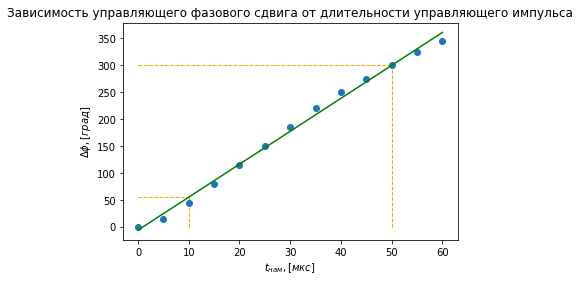

In [ ]:
plt.figure()
plt.plot(data["t"],data["delta_phi"],"o"
,x_for_line,line(x_for_line),"g"
#,x_for_line,list(map(f,x_for_line)),"b"
         )
plt.xlabel('$t_{нам}, [мкc]$')
plt.ylabel('$\Delta \phi, [град]$')
plt.title("Зависимость управляющего фазового сдвига от длительности управляющего импульса")

plt.hlines(y=line(10), xmin=0, xmax=10,colors="orange",linewidth = 1, linestyle = "--")
plt.vlines(x=10, ymin=0, ymax=line(10),colors="orange",linewidth = 1, linestyle = "--")
plt.hlines(y=line(50), xmin=0, xmax=50,colors="orange",linewidth = 1, linestyle = "--")
plt.vlines(x=50, ymin=0, ymax=line(50),colors="orange",linewidth = 1, linestyle = "--")

Теперь найдем крутизну аппроксимированной фазовой характеристики фазовращателя

$K = \frac{\Delta\varphi_2 - \Delta\varphi_1}{t_{нам2}-t_{нам1}} \approx \frac{299.62 - 55}{50-10} = 6.12 \frac{град}{мкс}$

In [ ]:
print(round(line(50),2),round(line(10),2))

299.62 55.0


In [ ]:
K  = (line(50) - line(10))/(50-10)
round(K,2)

6.12

In [ ]:
!pip install handcalcs